In [1]:
#Importing required packages.

import pandas as pd
import numpy as np
import sys
import os

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


#feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder

#train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore
from sklearn.feature_selection import RFE

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#ML models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading train and test data
df_train = pd.read_csv(r'C:\Users\Dell\Downloads\Project-Housing--2---1---1- (1)\Project-Housing_splitted\train.csv')
df_test = pd.read_csv(r'C:\Users\Dell\Downloads\Project-Housing--2---1---1- (1)\Project-Housing_splitted\test.csv')

In [3]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
df_train.shape

(1168, 81)

In [5]:
df_train.SalePrice.isnull().sum()

0

In [6]:
df_train['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [9]:
df_train.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
99%,1443.330000,190.000000,146.35000,36863.520000,10.000000,9.000000,2009.000000,2009.000000,804.000000,1583.890000,...,502.970000,283.980000,265.320000,168.000000,265.330000,0.000000,915.500000,12.000000,2010.000000,443943.500000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### now let's check the dataset for the amount of nulls present

In [10]:
round(df_train.isnull().sum()/len(df_train.index),2).sort_values(ascending=False).head(18)

PoolQC          0.99
MiscFeature     0.96
Alley           0.93
Fence           0.80
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.05
GarageFinish    0.05
GarageType      0.05
GarageQual      0.05
GarageCond      0.05
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
dtype: float64

In [11]:
round(df_test.isnull().sum()/len(df_test.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.97
Alley           0.95
Fence           0.85
FireplaceQu     0.48
LotFrontage     0.15
GarageQual      0.06
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageCond      0.06
BsmtFinType1    0.02
BsmtFinType2    0.02
BsmtQual        0.02
BsmtCond        0.02
BsmtExposure    0.02
KitchenQual     0.00
Id              0.00
dtype: float64

### Considering 10% as my threshold and dropping the column having more then the threshold....

In [12]:
round(df_train.isnull().sum()/len(df_train.index),2)[round(df_train.isnull().sum()/
                                                                 len(df_train.index),2).values>0.10]

LotFrontage    0.18
Alley          0.93
FireplaceQu    0.47
PoolQC         0.99
Fence          0.80
MiscFeature    0.96
dtype: float64

In [13]:
df_train = df_train.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

In [14]:
round(df_test.isnull().sum()/len(df_test.index),2)[round(df_test.isnull().sum()/
                                                                 len(df_test.index),2).values>0.10]

LotFrontage    0.15
Alley          0.95
FireplaceQu    0.48
PoolQC         1.00
Fence          0.85
MiscFeature    0.97
dtype: float64

In [15]:
df_test = df_test.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

### now let's check the columns where the missing values between 0-10%........

In [16]:
round(df_train.isnull().sum()/len(df_train.index),2)[round(df_train.isnull().sum()/
                                                                 len(df_train.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.05
GarageYrBlt     0.05
GarageFinish    0.05
GarageQual      0.05
GarageCond      0.05
dtype: float64

#### Before going further we will try to convert the Year columns with the age where we are going to fill these columns with number , And if we query the max year for all these columns these will come out to be 2010 ,EX suppose the YearBuilt=2006 , Then YearBuiltOld = 2010-2006 =4

In [17]:
df_train['YearBuilt_Old'] = df_train.YearBuilt.max()-df_train.YearBuilt
df_train['YearRemodAdd_Old'] = df_train.YearRemodAdd.max()-df_train.YearRemodAdd
df_train['GarageYrBlt_Old'] = df_train.GarageYrBlt.max()-df_train.GarageYrBlt
df_train['YrSold_Old'] = df_train.YrSold.max()-df_train.YrSold
df_train[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
862,2007,2007,2007.0,2007,3,3,3.0,3
1038,1958,2006,1958.0,2007,52,4,52.0,3
39,1930,1960,1988.0,2008,80,50,22.0,2
376,2001,2001,2001.0,2007,9,9,9.0,3
738,1965,1965,1965.0,2008,45,45,45.0,2
182,1910,1950,1966.0,2010,100,60,44.0,0
1116,1958,1958,1958.0,2008,52,52,52.0,2
707,1992,1992,1992.0,2010,18,18,18.0,0
1084,2007,2007,2007.0,2007,3,3,3.0,3
1157,2003,2004,2003.0,2010,7,6,7.0,0


In [18]:
df_train = df_train.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

### now let's check the columns where the missing values between 0-10% for test data

In [19]:
round(df_test.isnull().sum()/len(df_test.index),2)[round(df_test.isnull().sum()/
                                                                 len(df_test.index),2).values>0.00]

BsmtQual        0.02
BsmtCond        0.02
BsmtExposure    0.02
BsmtFinType1    0.02
BsmtFinType2    0.02
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

#### Before going further we will try to convert the Year columns with the age where we are going to fill these columns with number , And if we query the max year for all these columns these will come out to be 2010 ,EX suppose the YearBuilt=2006 , Then YearBuiltOld = 2010-2006 =4

In [20]:
df_test['YearBuilt_Old'] = df_test.YearBuilt.max()-df_test.YearBuilt
df_test['YearRemodAdd_Old'] = df_test.YearRemodAdd.max()-df_test.YearRemodAdd
df_test['GarageYrBlt_Old'] = df_test.GarageYrBlt.max()-df_test.GarageYrBlt
df_test['YrSold_Old'] = df_test.YrSold.max()-df_test.YrSold
df_test[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
251,2004,2005,2004.0,2010,5,5,6.0,0
162,1997,1997,1997.0,2006,12,13,13.0,4
279,2008,2008,2008.0,2008,1,2,2.0,2
245,2001,2002,2001.0,2009,8,8,9.0,1
49,2007,2008,2007.0,2009,2,2,3.0,1
10,1927,1950,1920.0,2008,82,60,90.0,2
255,1997,1997,1997.0,2009,12,13,13.0,1
228,2006,2006,2006.0,2009,3,4,4.0,1
291,1973,1973,1973.0,2006,36,37,37.0,4
192,1988,1989,1988.0,2008,21,21,22.0,2


In [21]:
df_test = df_test.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

### As per the analysis 'Street' & 'Utilities' is explaining the lowest valrience hence dropping these columns

In [22]:
df_train.Street.value_counts()
df_train.Utilities.value_counts()
df_train = df_train.drop(['Street','Utilities'],axis='columns')

In [23]:
df_train = df_train.drop('Id',axis='columns')

In [24]:
df_train[list(df_train.dtypes[df_train.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000
mean,56.767979,10484.749144,6.104452,5.595890,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,...,23.015411,3.639555,15.051370,3.448630,47.315068,181477.005993,39.069349,25.241438,31.806159,2.195205
std,41.940650,8957.442311,1.390153,1.124343,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,...,63.191089,29.088867,55.080816,44.896939,543.264432,79105.586863,30.145255,20.785185,24.890704,1.329738
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7621.500000,5.000000,5.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,130375.000000,10.000000,6.000000,8.000000,1.000000
50%,50.000000,9522.500000,6.000000,5.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,163995.000000,38.000000,17.000000,30.000000,2.000000
75%,70.000000,11515.500000,7.000000,6.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,215000.000000,56.000000,44.000000,49.000000,3.000000
max,190.000000,164660.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,135.000000,60.000000,110.000000,4.000000


In [25]:
df_test.Street.value_counts()
df_test.Utilities.value_counts()
df_test = df_test.drop(['Street','Utilities'],axis='columns')

In [26]:
df_test = df_test.drop('Id',axis='columns')

In [27]:
df_test[list(df_test.dtypes[df_test.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,275.000000,292.000000
mean,57.414384,10645.143836,6.078767,5.493151,109.171821,439.294521,46.157534,557.315068,1042.767123,1133.691781,...,47.061644,17.708904,2.489726,15.099315,0.0,28.184932,36.383562,24.705479,30.240000,2.140411
std,43.780649,13330.669795,1.356147,1.063267,175.030021,429.559675,152.467119,411.043768,424.561153,366.941919,...,65.865449,51.892906,30.247488,58.483473,0.0,224.036218,30.447016,20.105792,23.868875,1.322867
min,20.000000,1526.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7200.000000,5.000000,5.000000,0.000000,0.000000,0.000000,255.000000,771.750000,858.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,6.750000,7.000000,1.000000
50%,50.000000,9200.000000,6.000000,5.000000,0.000000,369.500000,0.000000,487.000000,971.000000,1047.500000,...,28.500000,0.000000,0.000000,0.000000,0.0,0.000000,33.000000,16.000000,31.000000,2.000000
75%,70.000000,11658.750000,7.000000,6.000000,180.000000,700.500000,0.000000,780.000000,1322.000000,1370.500000,...,66.000000,0.000000,0.000000,0.000000,0.0,0.000000,55.000000,42.000000,46.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1031.000000,1767.000000,1085.000000,1935.000000,3094.000000,2402.000000,...,418.000000,330.000000,407.000000,396.000000,0.0,3500.000000,137.000000,60.000000,94.000000,4.000000


## EDA

In [28]:
df_train_nominal = df_train[['MSZoning',
        'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'GarageType', 'GarageFinish',  'GarageQual',
       'GarageCond', 'PavedDrive','SaleType',
       'SaleCondition']].copy()

In [29]:
df_train_nominal.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [30]:
df_train_nominal.shape

(1168, 36)

In [31]:
df_test_nominal = df_test[['MSZoning',
        'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'GarageType', 'GarageFinish',  'GarageQual',
       'GarageCond', 'PavedDrive','SaleType',
       'SaleCondition']].copy()

In [32]:
df_test_nominal.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [33]:
df_test_nominal.shape

(292, 36)

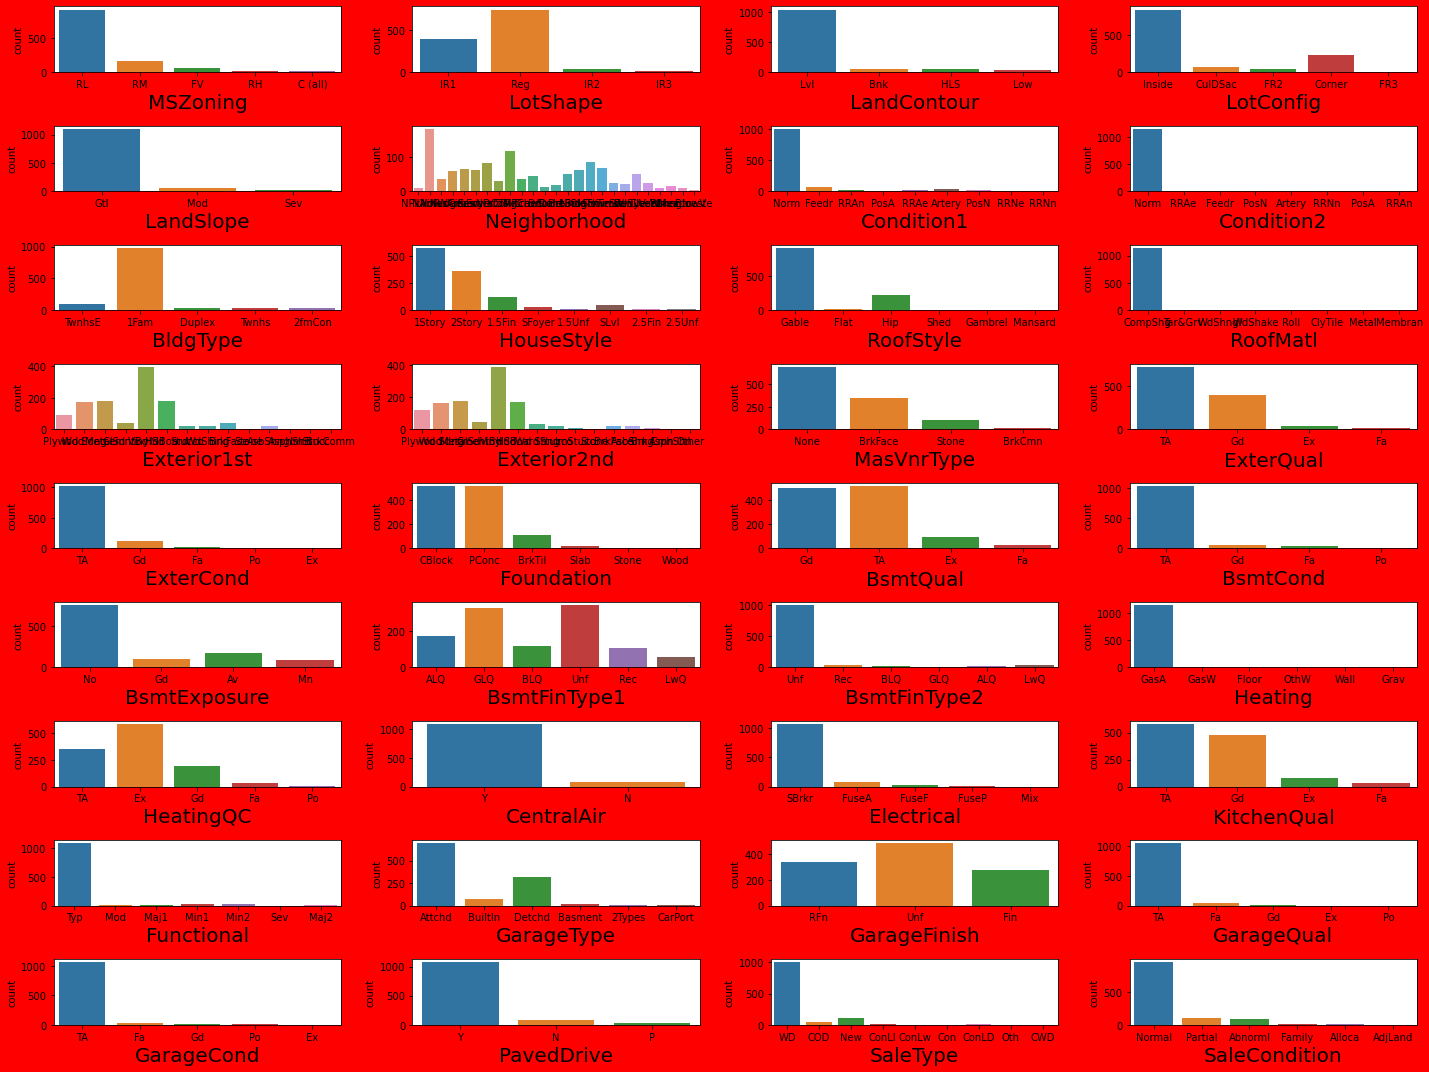

In [34]:
# visualizing data distribution in every column
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in df_train_nominal:
    if plotnumber<=36:   # there are 35 column is the given data
        ax = plt.subplot(9,4,plotnumber)
        sns.countplot(df_train_nominal[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

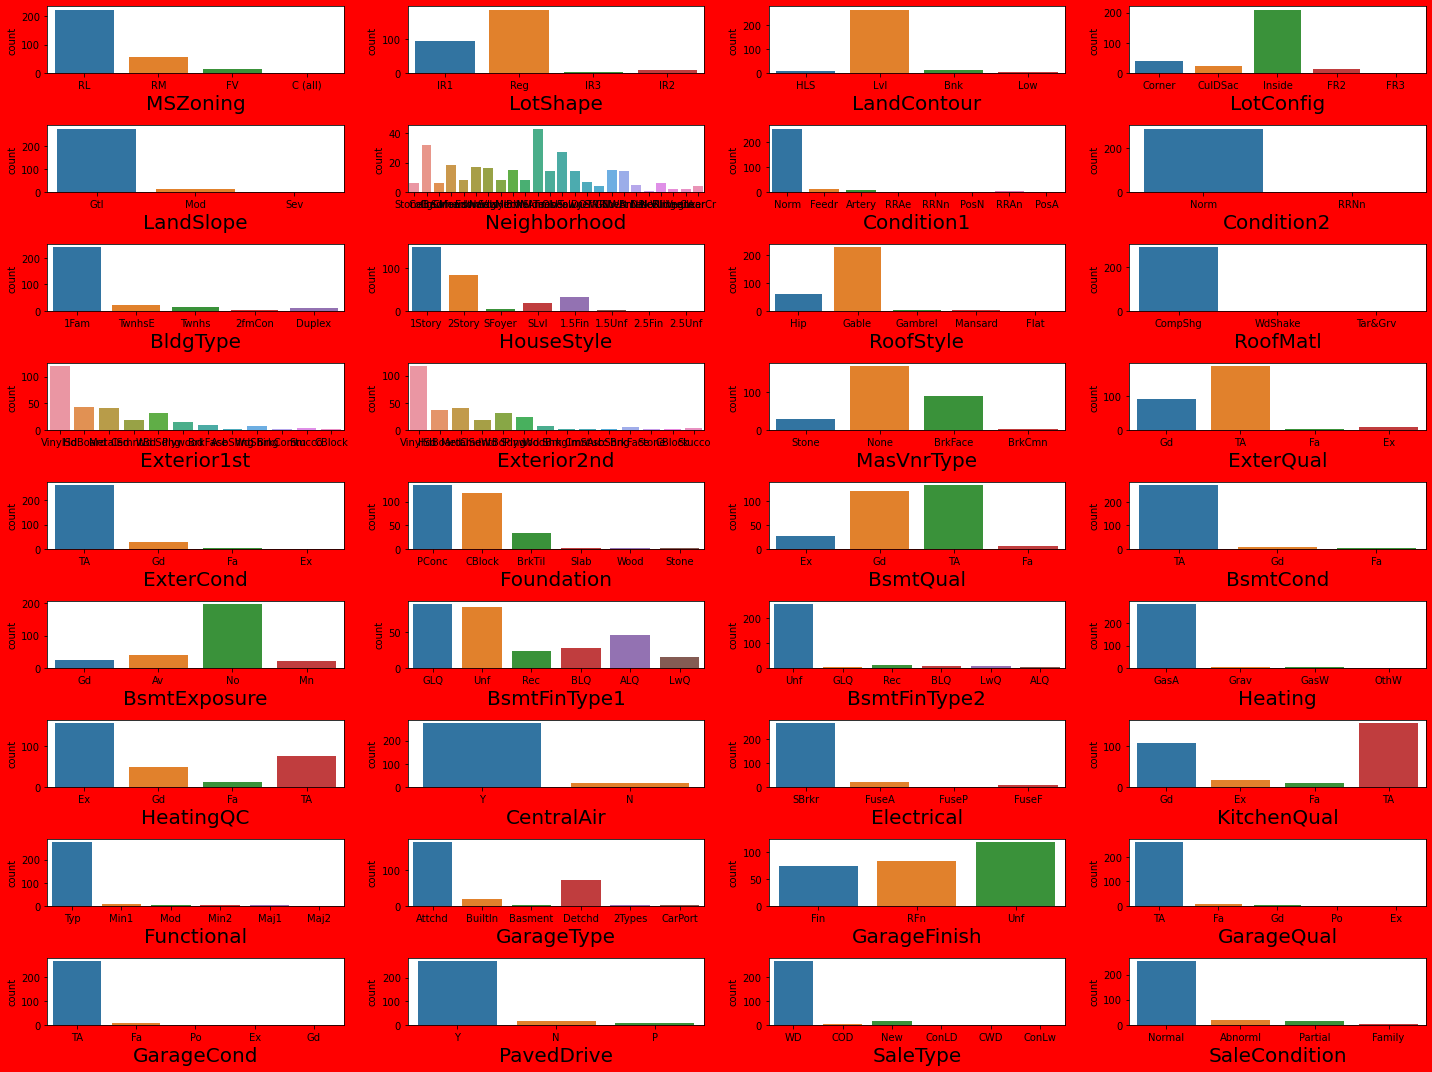

In [35]:
# visualizing data distribution in every column
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in df_test_nominal:
    if plotnumber<=36:   # there are 15 column is the given data
        ax = plt.subplot(9,4,plotnumber)
        sns.countplot(df_test_nominal[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

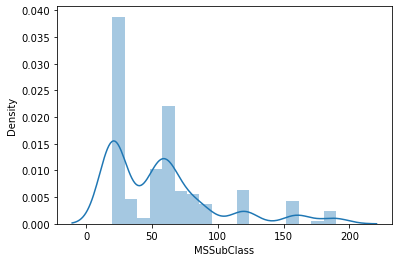

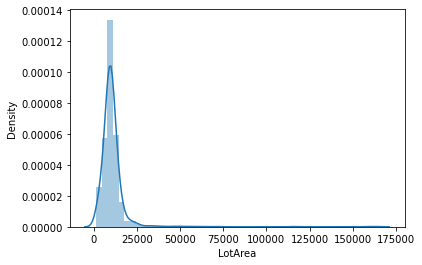

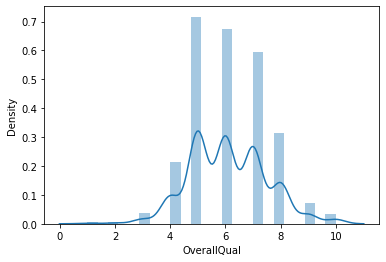

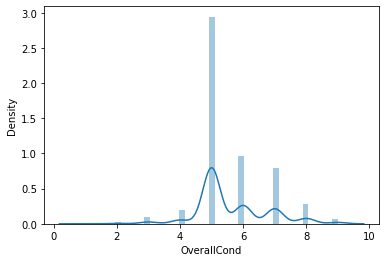

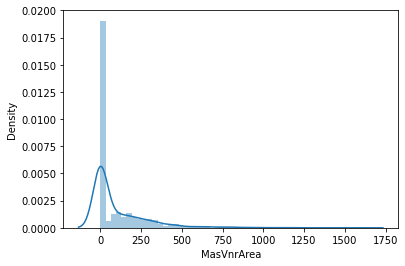

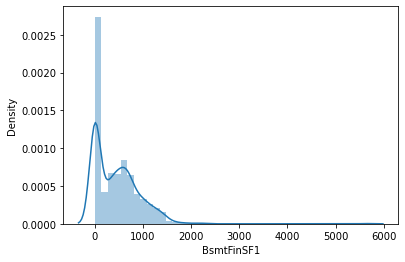

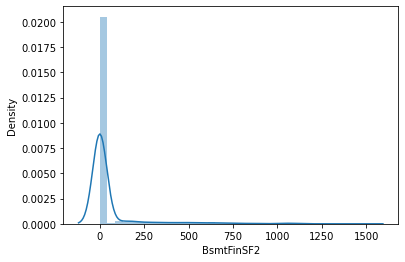

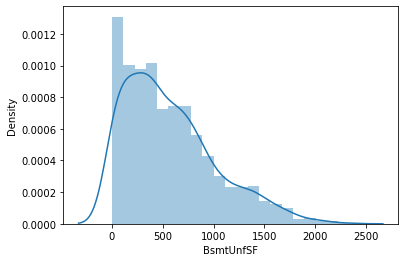

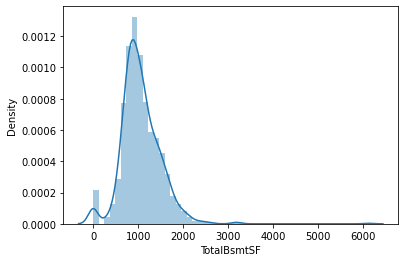

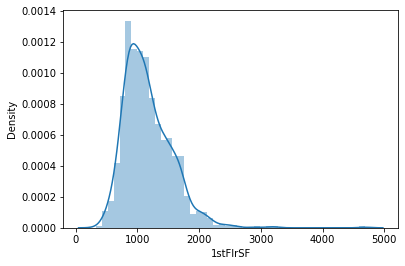

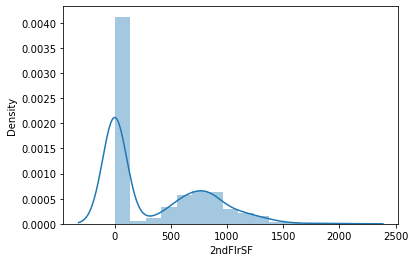

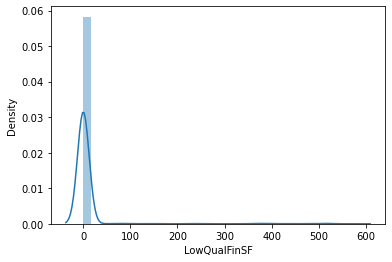

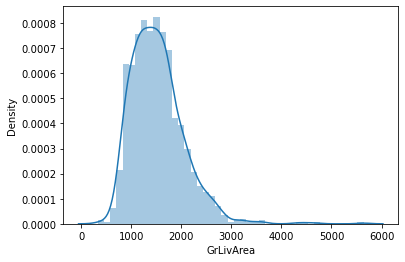

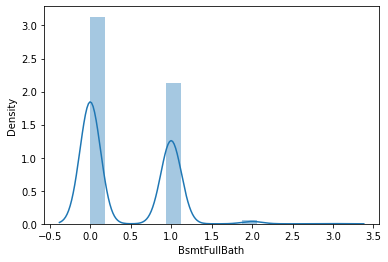

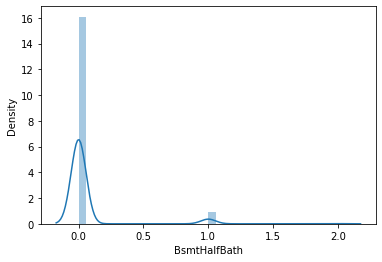

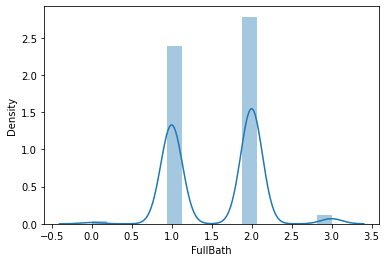

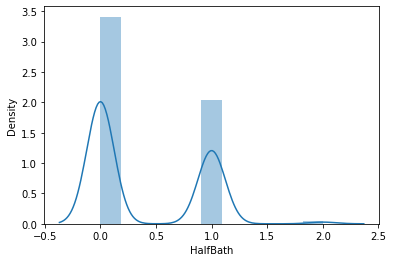

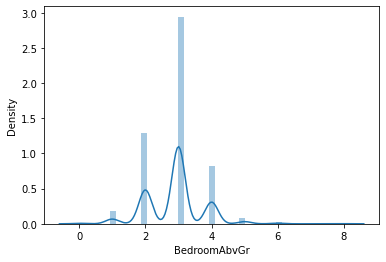

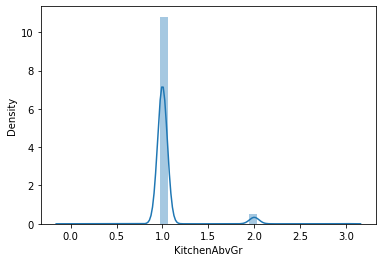

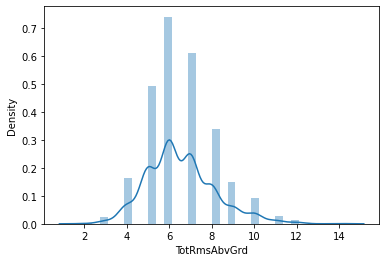

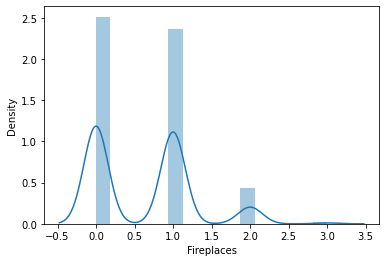

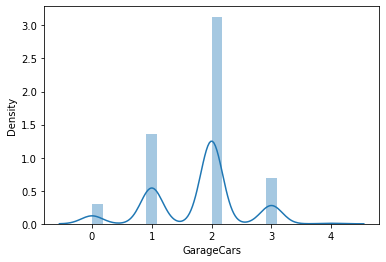

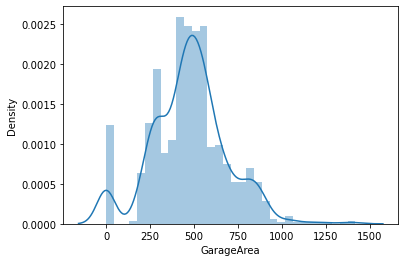

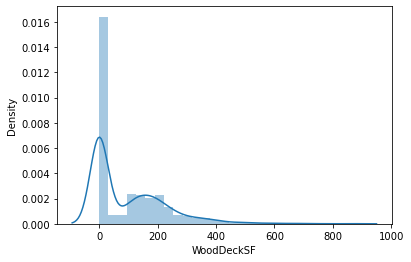

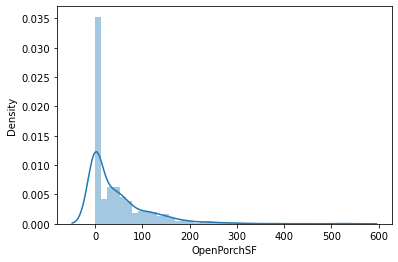

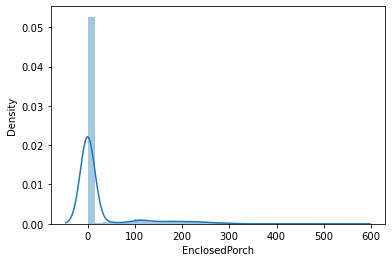

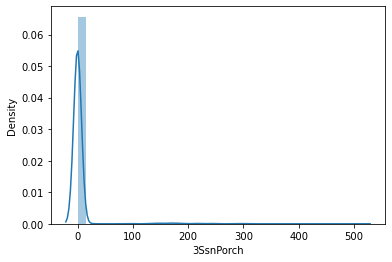

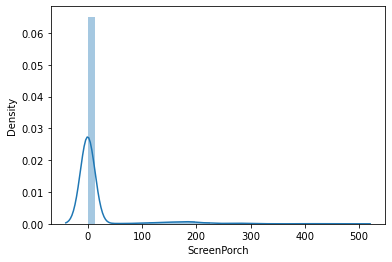

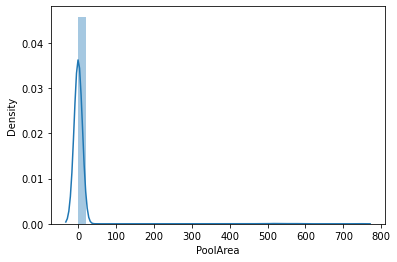

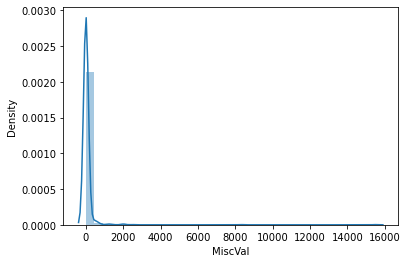

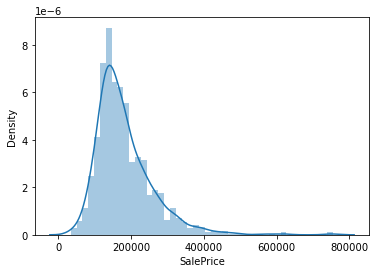

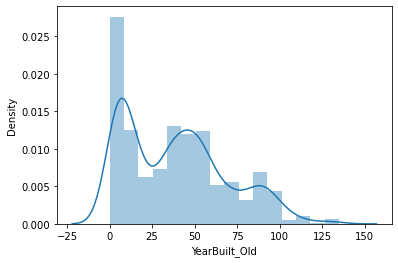

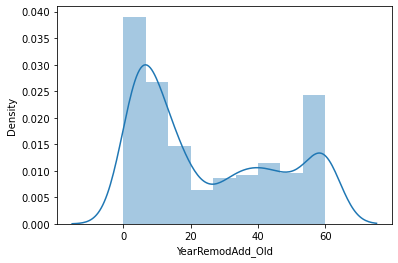

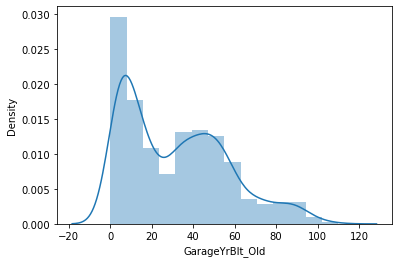

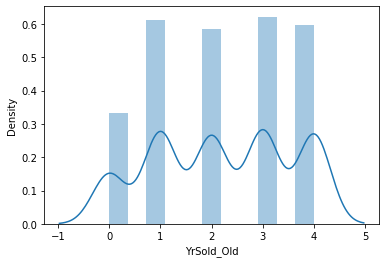

In [36]:
for i in df_train.describe().columns:
    sns.distplot(df_train[i].dropna())
    plt.show()

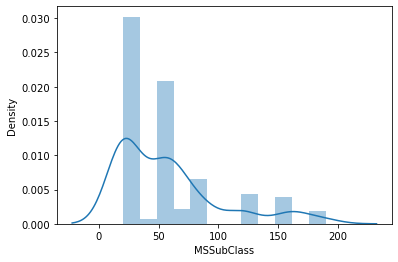

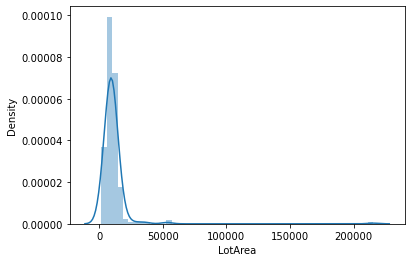

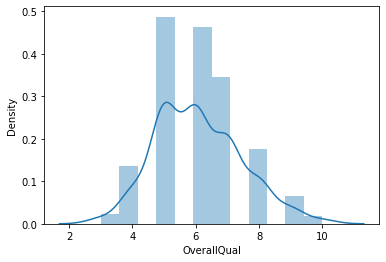

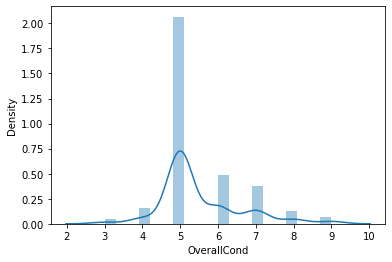

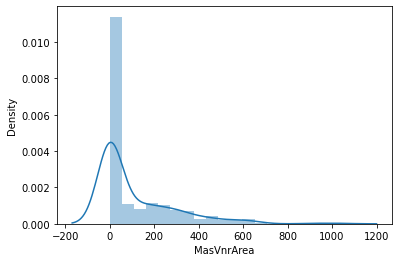

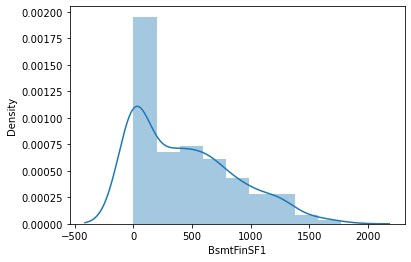

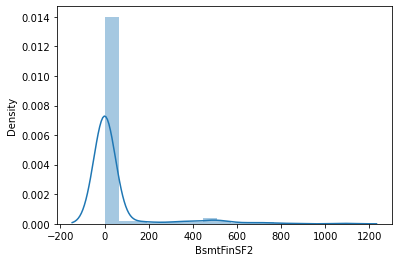

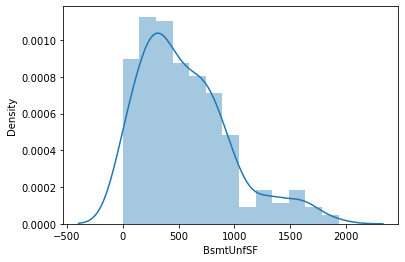

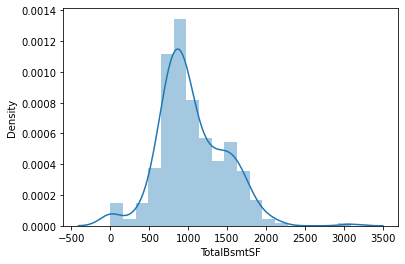

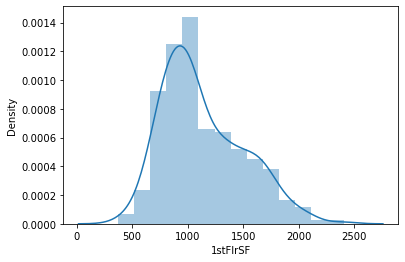

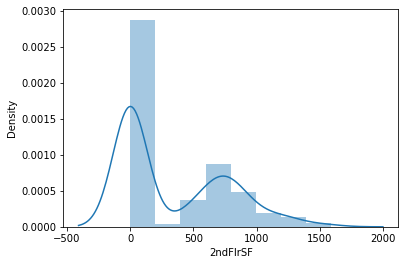

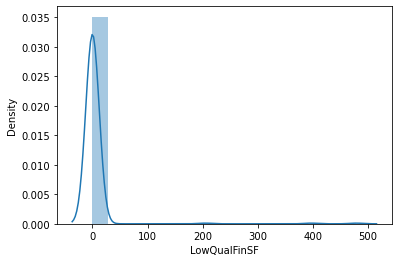

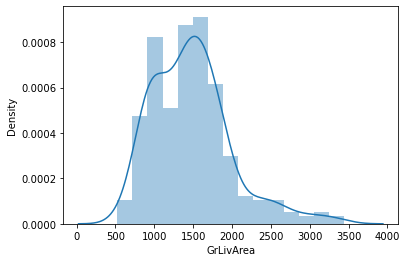

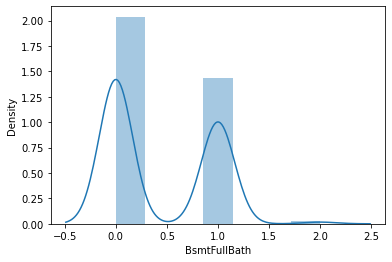

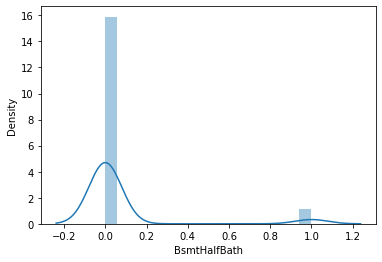

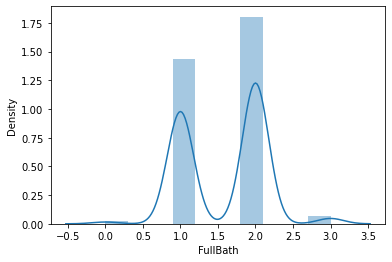

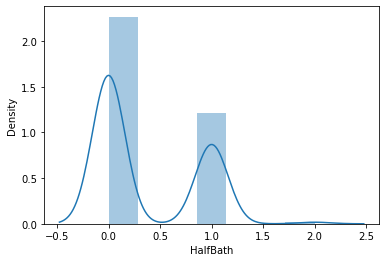

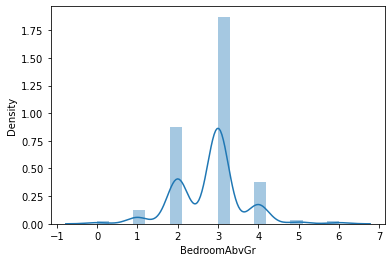

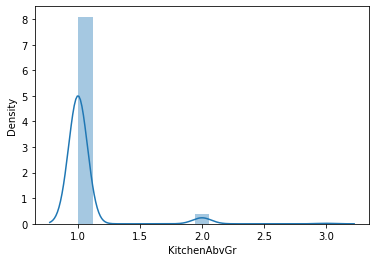

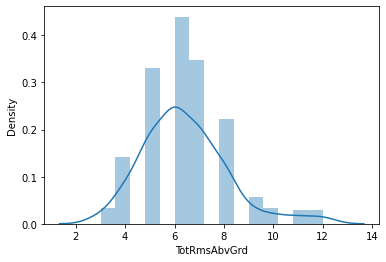

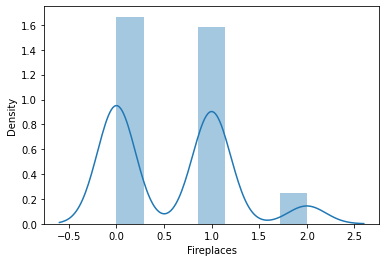

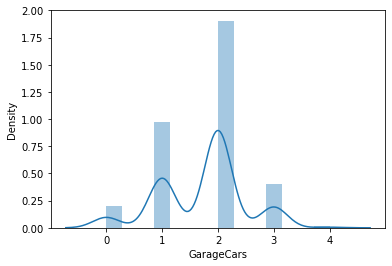

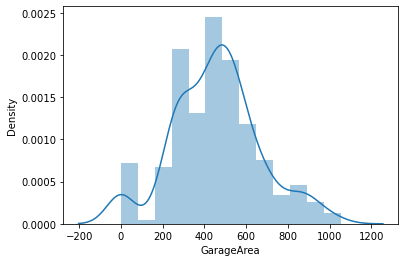

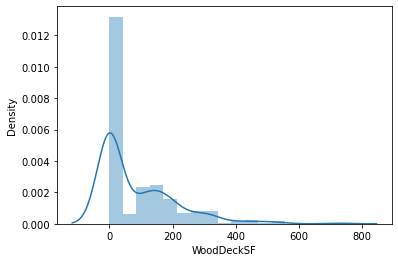

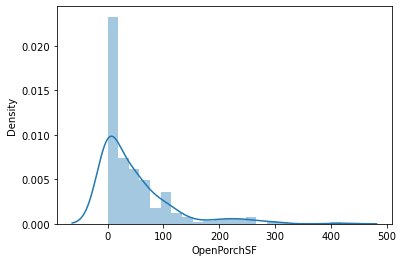

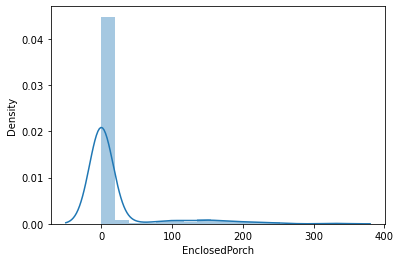

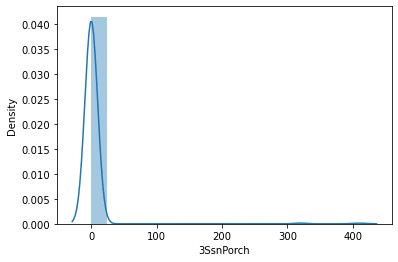

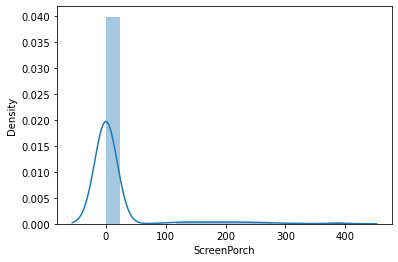

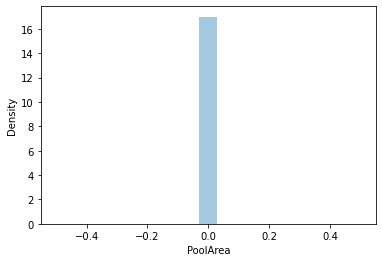

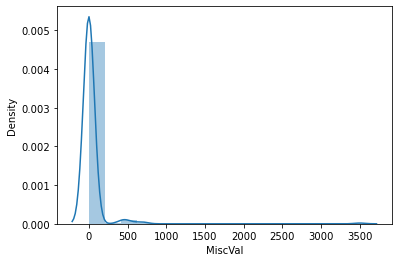

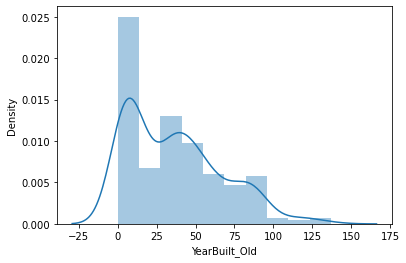

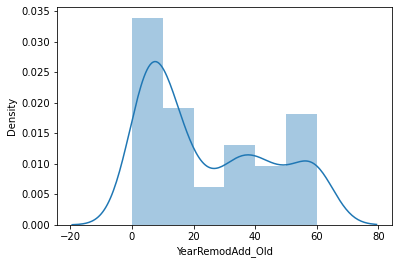

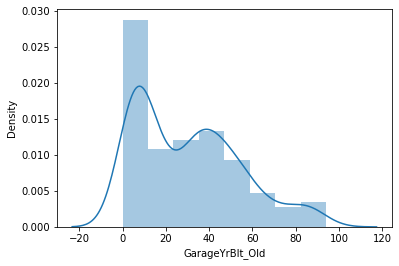

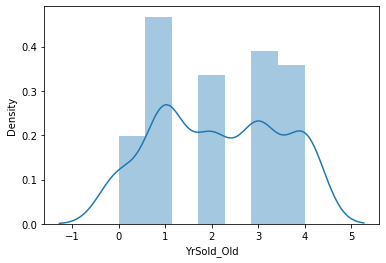

In [37]:
for i in df_test.describe().columns:
    sns.distplot(df_test[i].dropna())
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Plywood'),
  Text(1, 0, 'Wd Sdng'),
  Text(2, 0, 'MetalSd'),
  Text(3, 0, 'CmentBd'),
  Text(4, 0, 'VinylSd'),
  Text(5, 0, 'HdBoard'),
  Text(6, 0, 'Wd Shng'),
  Text(7, 0, 'Stucco'),
  Text(8, 0, 'ImStucc'),
  Text(9, 0, 'Stone'),
  Text(10, 0, 'BrkFace'),
  Text(11, 0, 'AsbShng'),
  Text(12, 0, 'Brk Cmn'),
  Text(13, 0, 'AsphShn'),
  Text(14, 0, 'Other')])

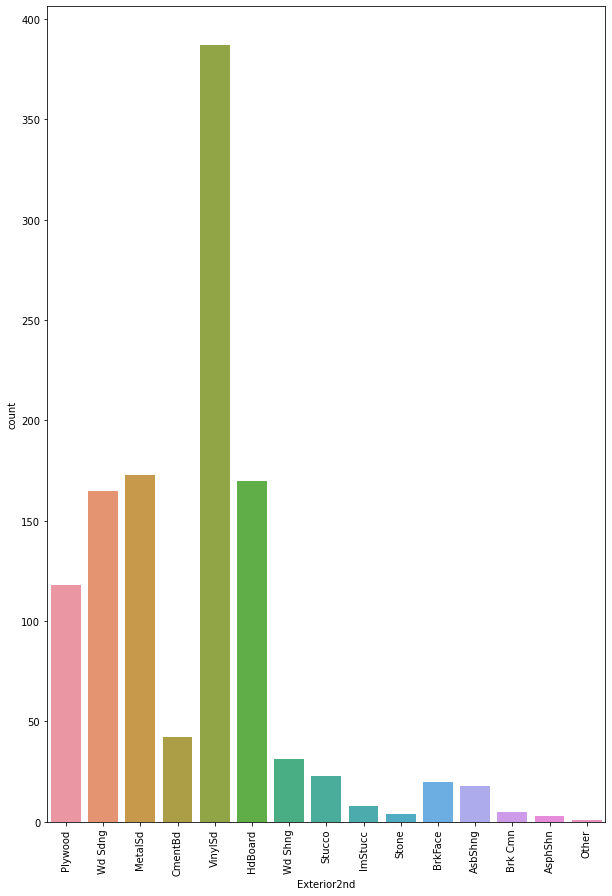

In [38]:
plt.figure(figsize=(10,15))
sns.countplot(df_train_nominal.Exterior2nd)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'VinylSd'),
  Text(1, 0, 'HdBoard'),
  Text(2, 0, 'MetalSd'),
  Text(3, 0, 'CmentBd'),
  Text(4, 0, 'Wd Sdng'),
  Text(5, 0, 'Plywood'),
  Text(6, 0, 'Wd Shng'),
  Text(7, 0, 'Brk Cmn'),
  Text(8, 0, 'ImStucc'),
  Text(9, 0, 'AsbShng'),
  Text(10, 0, 'BrkFace'),
  Text(11, 0, 'Stone'),
  Text(12, 0, 'CBlock'),
  Text(13, 0, 'Stucco')])

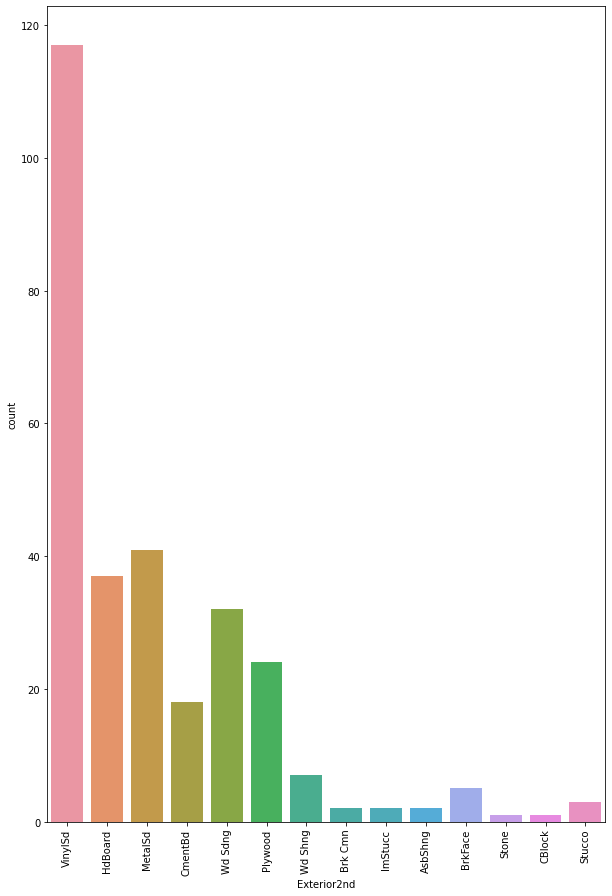

In [39]:
plt.figure(figsize=(10,15))
sns.countplot(df_test_nominal.Exterior2nd)
plt.xticks(rotation=90)

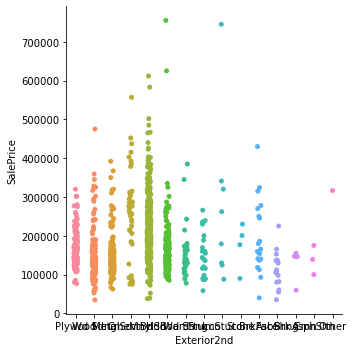

In [40]:
sns.catplot(x="Exterior2nd",y="SalePrice",data=df_train)

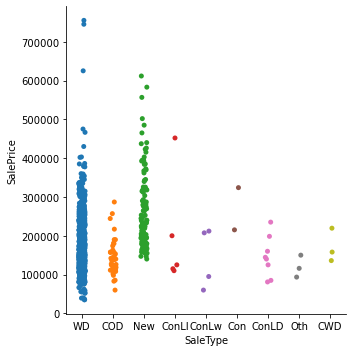

In [41]:
sns.catplot(x="SaleType",y="SalePrice",data=df_train)

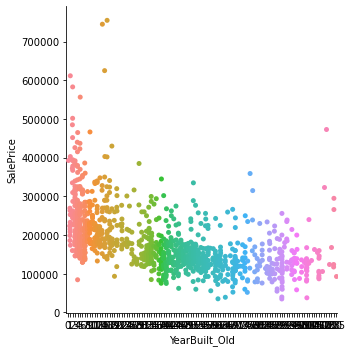

In [42]:
sns.catplot(x="YearBuilt_Old", y="SalePrice",data=df_train)

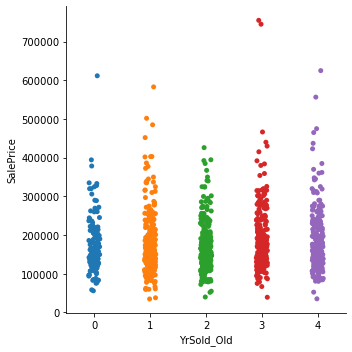

In [43]:
sns.catplot(x="YrSold_Old", y="SalePrice",data=df_train)

### scatter plot

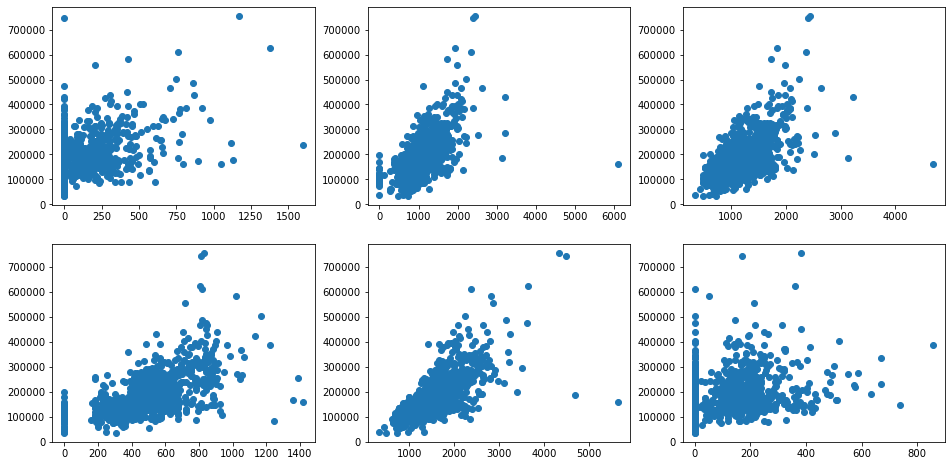

In [44]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df_train.MasVnrArea,df_train.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df_train.TotalBsmtSF,df_train.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df_train['1stFlrSF'],df_train.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df_train['GarageArea'],df_train.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df_train['GrLivArea'],df_train.SalePrice)
plt.subplot(2,3,6)
plt.scatter(df_train['WoodDeckSF'],df_train.SalePrice)

### Correlation

In [45]:
df_train.corr()['SalePrice'].sort_values()

YearBuilt_Old      -0.514408
YearRemodAdd_Old   -0.507831
GarageYrBlt_Old    -0.474346
KitchenAbvGr       -0.132108
EnclosedPorch      -0.115004
OverallCond        -0.065642
MSSubClass         -0.060775
LowQualFinSF       -0.032381
MiscVal            -0.013071
BsmtHalfBath       -0.011109
BsmtFinSF2         -0.010151
YrSold_Old          0.045508
3SsnPorch           0.060119
ScreenPorch         0.100284
PoolArea            0.103280
BedroomAbvGr        0.158281
BsmtFullBath        0.212924
BsmtUnfSF           0.215724
LotArea             0.249499
HalfBath            0.295592
WoodDeckSF          0.315444
2ndFlrSF            0.330386
OpenPorchSF         0.339500
BsmtFinSF1          0.362874
Fireplaces          0.459611
MasVnrArea          0.466386
TotRmsAbvGrd        0.528363
FullBath            0.554988
1stFlrSF            0.587642
TotalBsmtSF         0.595042
GarageArea          0.619000
GarageCars          0.628329
GrLivArea           0.707300
OverallQual         0.789185
SalePrice     

<AxesSubplot:>

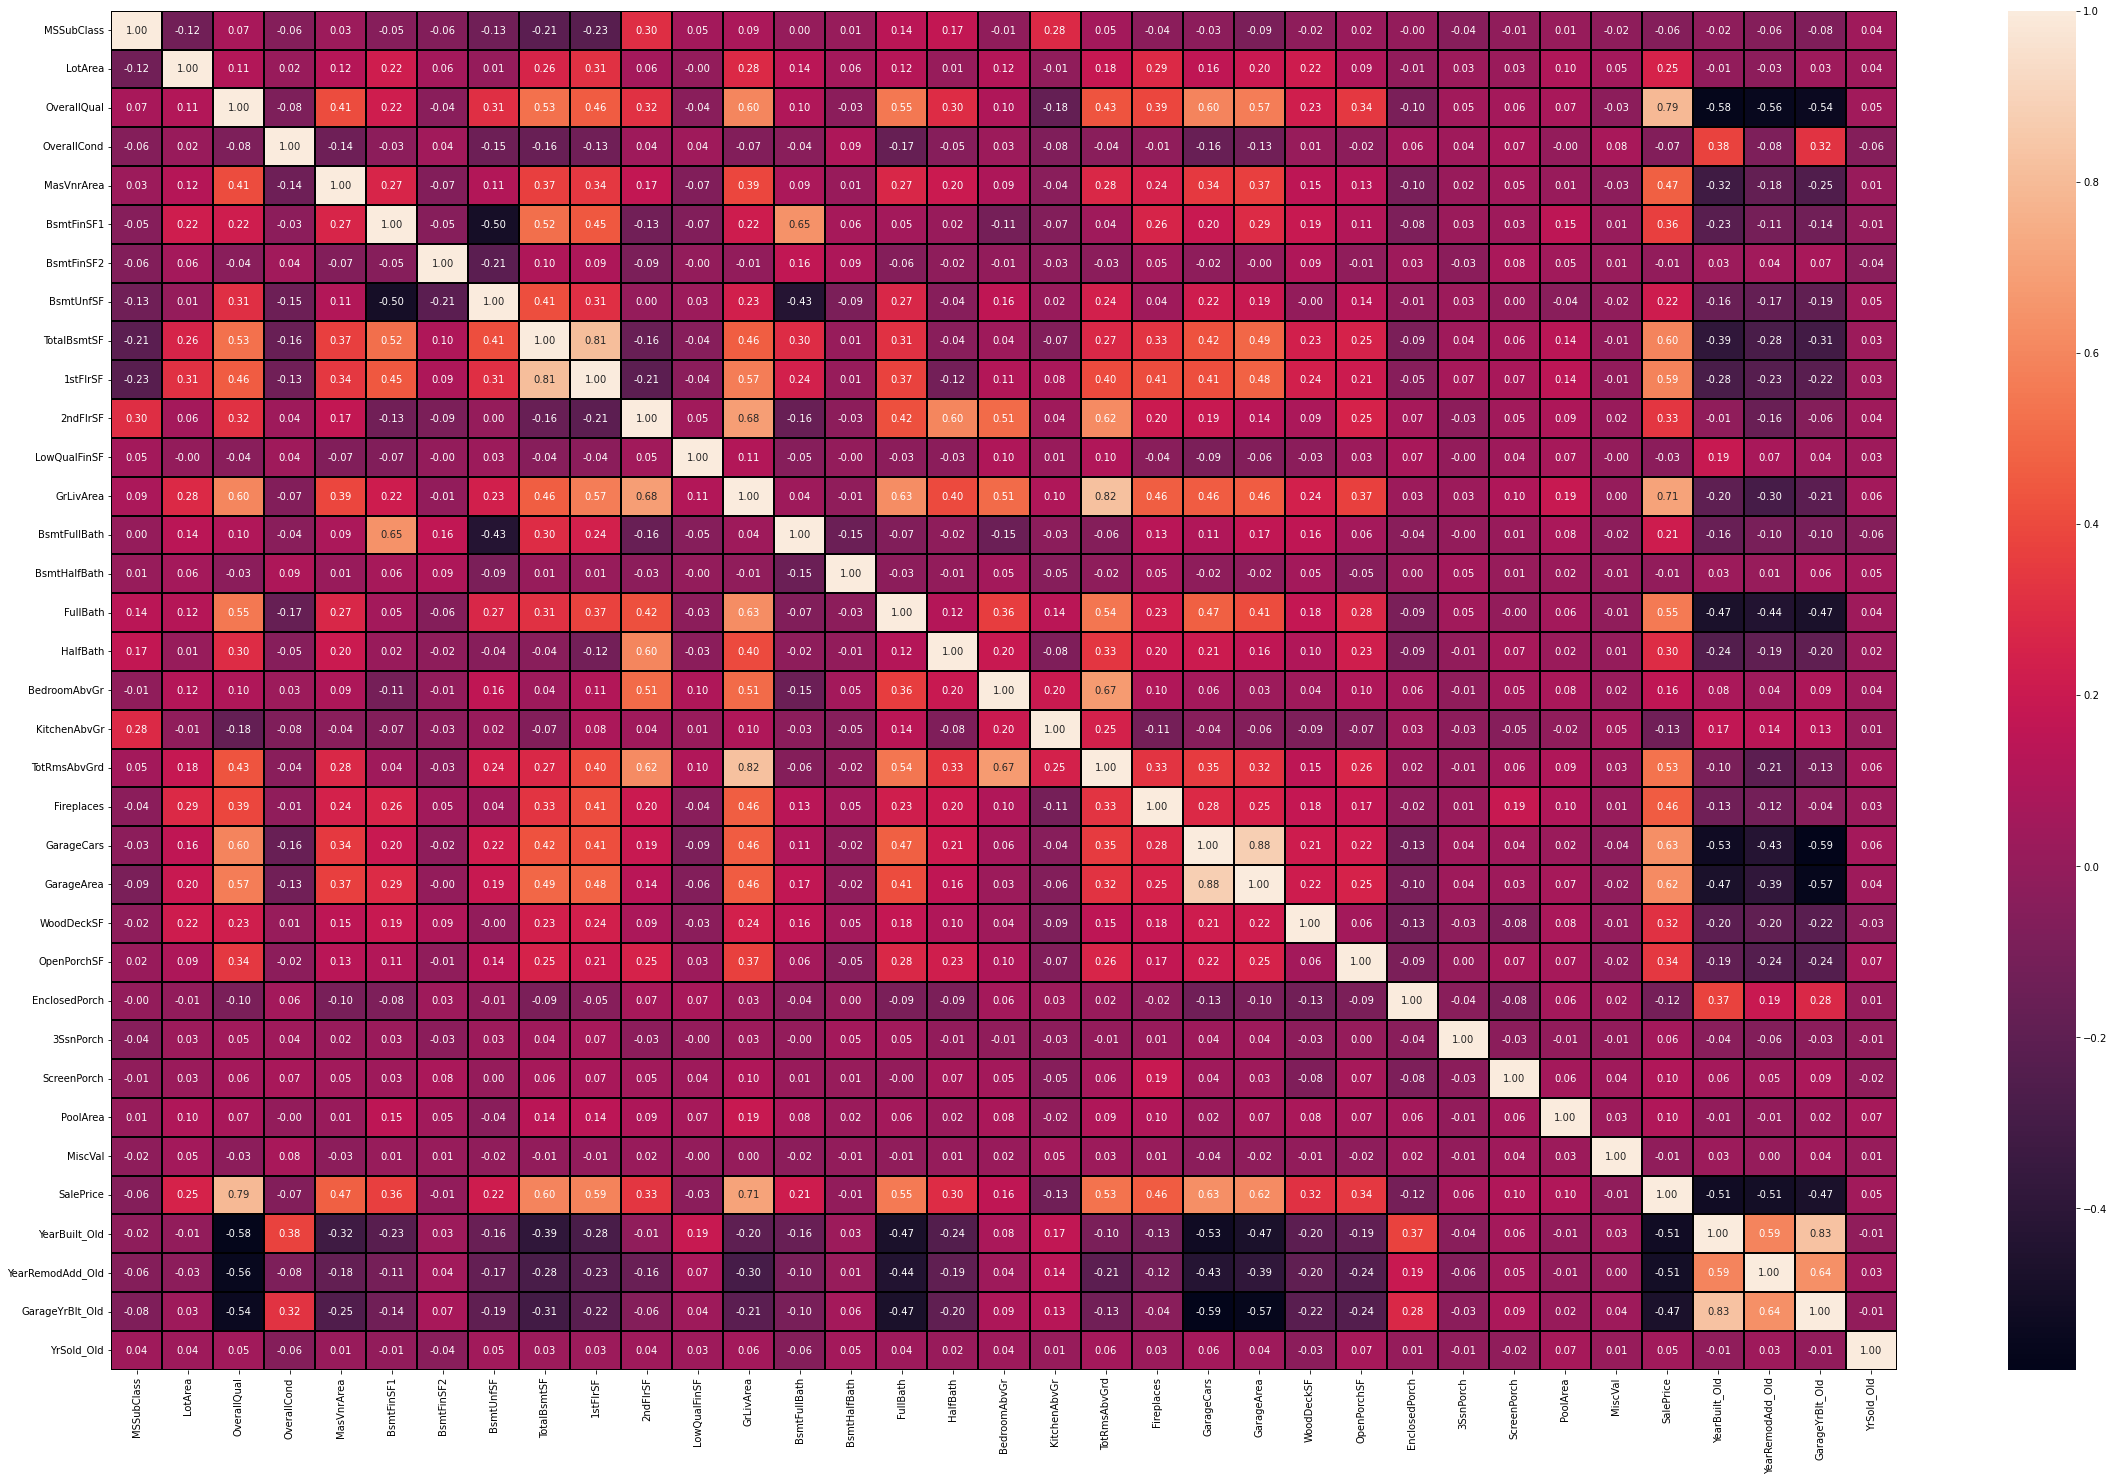

In [46]:
plt.figure(figsize=(40,25))
sns.heatmap(df_train.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

#### Notice imputing GarageYrBlt_Old with -1 as these house donot have garage

In [47]:
df_train.MasVnrType.fillna('None',inplace=True)
df_train.MasVnrArea.fillna(df_train.MasVnrArea.mean(),inplace=True)
df_train.BsmtQual.fillna('TA',inplace=True)
df_train.BsmtCond.fillna('TA',inplace=True)
df_train.BsmtExposure.fillna('No',inplace=True)
df_train.BsmtFinType1.fillna('Unf',inplace=True)
df_train.BsmtFinType2.fillna('Unf',inplace=True)
df_train.GarageType.fillna('Attchd',inplace=True)
df_train.GarageYrBlt_Old.fillna(-1,inplace=True)
df_train.GarageFinish.fillna('Unf',inplace=True)
df_train.GarageQual.fillna('TA',inplace=True)
df_train.GarageCond.fillna('TA',inplace=True)
df_train.SalePrice.fillna(df_train.SalePrice.mean(),inplace=True)

In [48]:
df_train.isnull().sum()

MSSubClass          0
MSZoning            0
LotArea             0
LotShape            0
LandContour         0
                   ..
SalePrice           0
YearBuilt_Old       0
YearRemodAdd_Old    0
GarageYrBlt_Old     0
YrSold_Old          0
Length: 71, dtype: int64

In [49]:
df_test.MasVnrType.fillna('None',inplace=True)
df_test.MasVnrArea.fillna(df_test.MasVnrArea.mean(),inplace=True)
df_test.BsmtQual.fillna('TA',inplace=True)
df_test.BsmtCond.fillna('TA',inplace=True)
df_test.BsmtExposure.fillna('No',inplace=True)
df_test.BsmtFinType1.fillna('Unf',inplace=True)
df_test.BsmtFinType2.fillna('Unf',inplace=True)
df_test.GarageType.fillna('Attchd',inplace=True)
df_test.GarageYrBlt_Old.fillna(-1,inplace=True)
df_test.GarageFinish.fillna('Unf',inplace=True)
df_test.GarageQual.fillna('TA',inplace=True)
df_test.GarageCond.fillna('TA',inplace=True)


In [50]:
df_test.isnull().sum()

MSSubClass          0
MSZoning            0
LotArea             0
LotShape            0
LandContour         0
                   ..
SaleCondition       0
YearBuilt_Old       0
YearRemodAdd_Old    0
GarageYrBlt_Old     0
YrSold_Old          0
Length: 70, dtype: int64

### Box plot to find outliers

In [51]:
df_train.skew()

MSSubClass           1.422019
LotArea             10.659285
OverallQual          0.175082
OverallCond          0.580714
MasVnrArea           2.834658
BsmtFinSF1           1.871606
BsmtFinSF2           4.365829
BsmtUnfSF            0.909057
TotalBsmtSF          1.744591
1stFlrSF             1.513707
2ndFlrSF             0.823479
LowQualFinSF         8.666142
GrLivArea            1.449952
BsmtFullBath         0.627106
BsmtHalfBath         4.264403
FullBath             0.057809
HalfBath             0.656492
BedroomAbvGr         0.243855
KitchenAbvGr         4.365259
TotRmsAbvGrd         0.644657
Fireplaces           0.671966
GarageCars          -0.358556
GarageArea           0.189665
WoodDeckSF           1.504929
OpenPorchSF          2.410840
EnclosedPorch        3.043610
3SsnPorch            9.770611
ScreenPorch          4.105741
PoolArea            13.243711
MiscVal             23.065943
SalePrice            1.953878
YearBuilt_Old        0.579204
YearRemodAdd_Old     0.495864
GarageYrBl

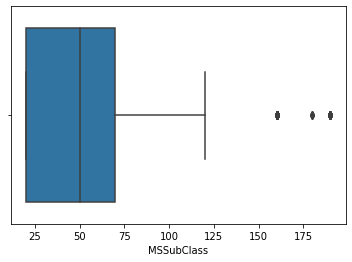

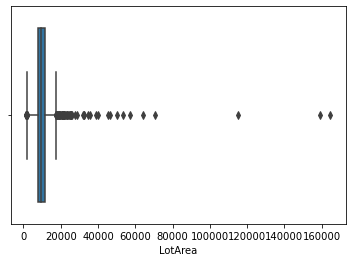

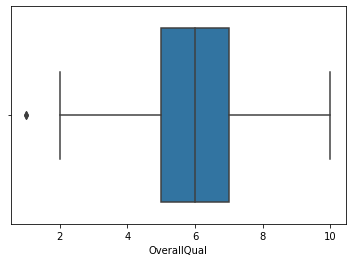

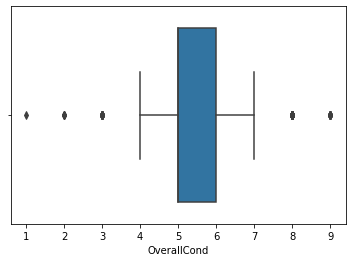

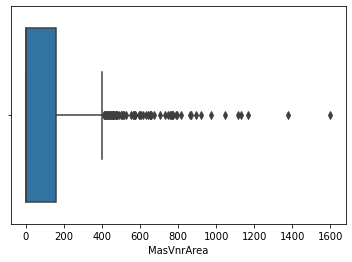

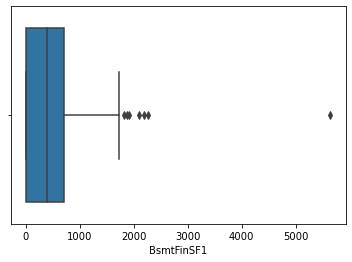

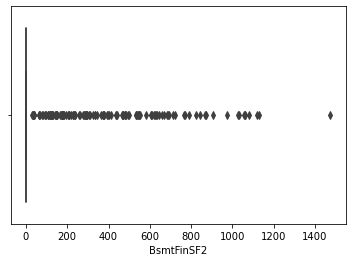

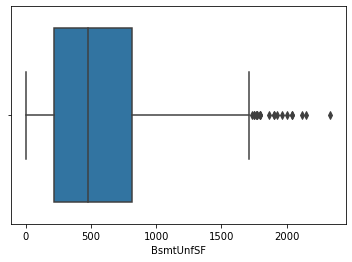

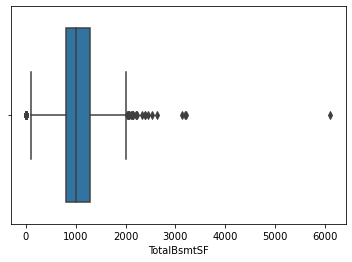

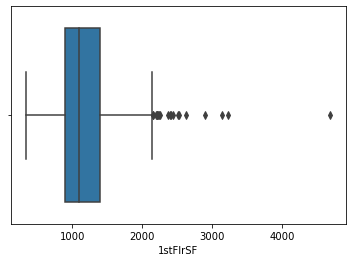

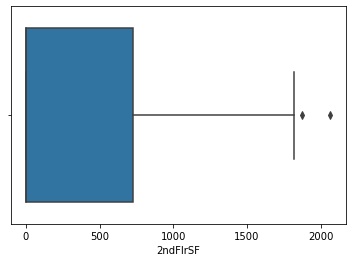

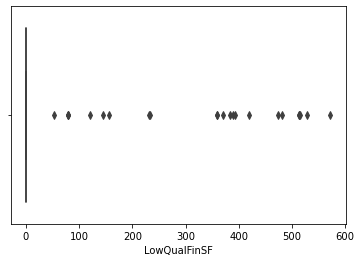

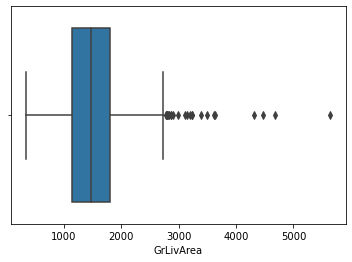

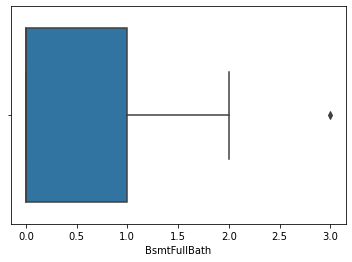

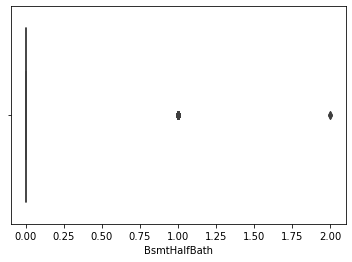

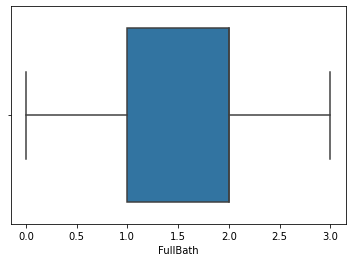

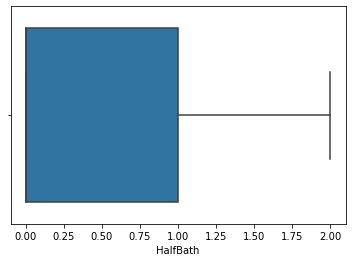

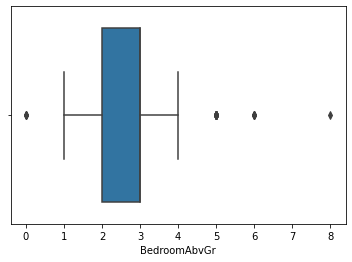

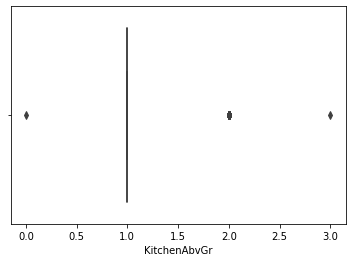

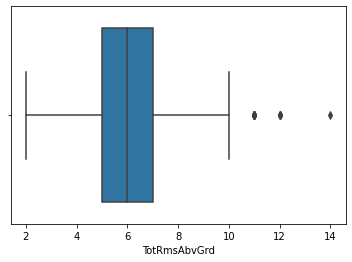

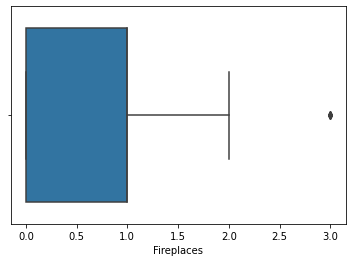

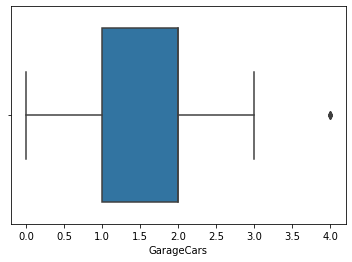

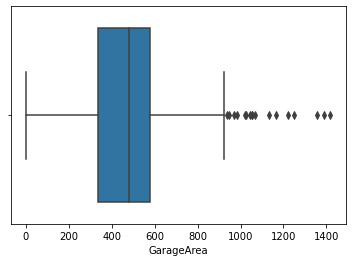

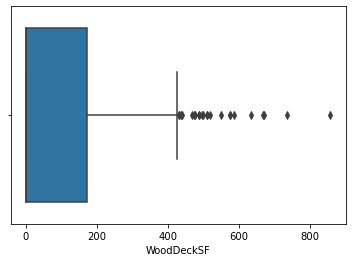

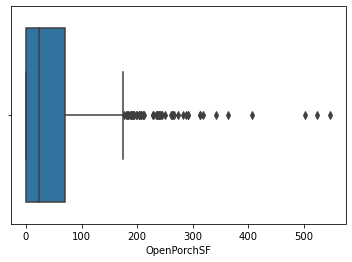

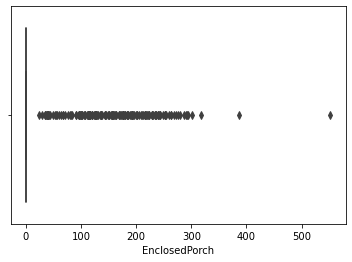

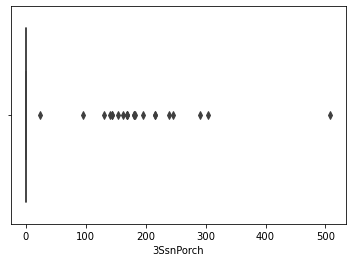

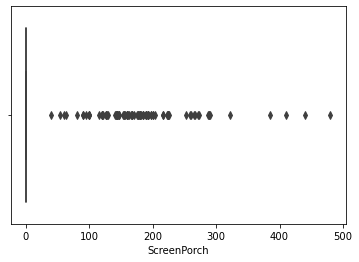

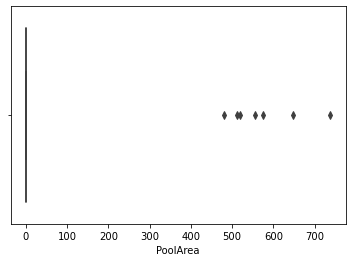

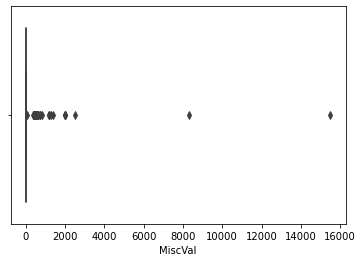

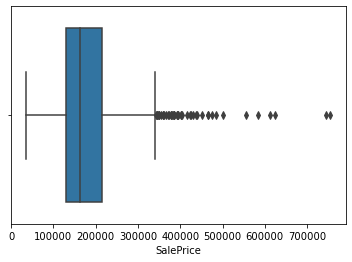

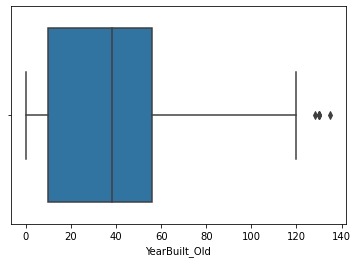

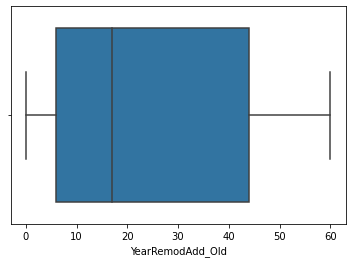

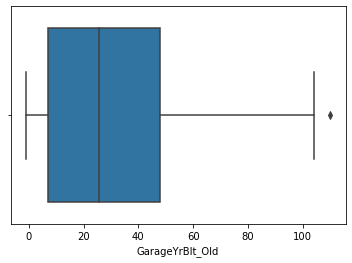

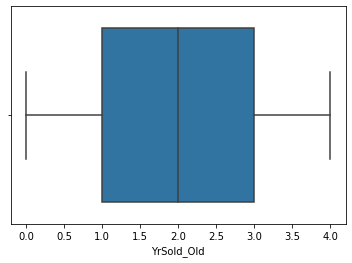

In [52]:
for i in df_train.describe().columns:
    sns.boxplot(df_train[i].dropna())
    plt.show()

### Below function is used for hadling the outliers where i am taking the lower and upper quantile as 0.25 & 0.99 respectively

In [53]:
num_col_train = list(df_train.dtypes[df_train.dtypes !='object'].index)
num_col_train = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col_train:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df_train = drop_outliers(df_train)

In [54]:
df_train.shape

(1151, 71)

In [55]:
num_col_test = list(df_test.dtypes[df_test.dtypes !='object'].index)
num_col_test = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal']
def drop_outliers(x):
    list = []
    for col in num_col_test:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df_test = drop_outliers(df_test)

In [56]:
df_test.shape

(288, 70)

In [57]:
df_train[list(df_train.dtypes[df_train.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,COD,Normal
4,RL,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


In [58]:
df_test[list(df_test.dtypes[df_test.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,IR1,HLS,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
1,RL,IR1,Lvl,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,COD,Abnorml
2,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,...,SBrkr,Ex,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Reg,Bnk,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Fa,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
4,RL,IR1,Lvl,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,BuiltIn,Fin,TA,TA,Y,WD,Normal


#### Lets check for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

In [59]:
df_train[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,TA,Gd,TA,No,ALQ,Unf,TA,Y,TA,RFn,TA,TA,TA,IR1
1,Mod,Gd,TA,Gd,Gd,ALQ,Rec,Ex,Y,Gd,Unf,TA,TA,Gd,IR1
2,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,TA,Unf,TA,TA,TA,IR1
3,Gtl,TA,Gd,TA,No,BLQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,No,ALQ,Unf,Gd,Y,Gd,Fin,TA,TA,TA,IR1


In [60]:
df_train['LandSlope'] = df_train.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df_train['ExterQual'] = df_train.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_train['BsmtQual'] = df_train.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['BsmtCond'] = df_train.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['BsmtExposure'] = df_train.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df_train['BsmtFinType1'] = df_train.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_train['BsmtFinType2'] = df_train.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_train['HeatingQC'] = df_train.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_train['CentralAir'] = df_train.CentralAir.map({'N':0,'Y':1})
df_train['KitchenQual'] = df_train.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_train['GarageFinish'] = df_train.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df_train['GarageQual'] = df_train.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['GarageCond'] = df_train.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['ExterCond'] = df_train.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_train['LotShape'] = df_train.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [61]:
df_test['LandSlope'] = df_test.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df_test['ExterQual'] = df_test.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_test['BsmtQual'] = df_test.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_test['BsmtCond'] = df_test.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_test['BsmtExposure'] = df_test.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df_test['BsmtFinType1'] = df_test.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_test['BsmtFinType2'] = df_test.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_test['HeatingQC'] = df_test.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_test['CentralAir'] = df_test.CentralAir.map({'N':0,'Y':1})
df_test['KitchenQual'] = df_test.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_test['GarageFinish'] = df_test.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df_test['GarageQual'] = df_test.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_test['GarageCond'] = df_test.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_test['ExterCond'] = df_test.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_test['LotShape'] = df_test.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [62]:
df_test[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,5,3,4,6,1,4,1,3,3,3,3,2,0
1,0,3,4,3,3,6,1,3,1,3,2,3,3,2,0
2,0,3,4,3,3,1,1,4,1,4,2,3,3,2,3
3,0,2,3,3,1,3,1,4,1,1,1,3,3,2,3
4,0,3,4,3,2,1,1,4,1,3,3,3,3,2,0


### Creating a dummy column

In [63]:
dummy_col = pd.get_dummies(df_train[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

df_train = pd.concat([df_train,dummy_col],axis='columns')

df_train = df_train.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

In [64]:
dummy_col = pd.get_dummies(df_test[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

df_test = pd.concat([df_test,dummy_col],axis='columns')

df_test = df_test.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

### Check the distribution of target variable

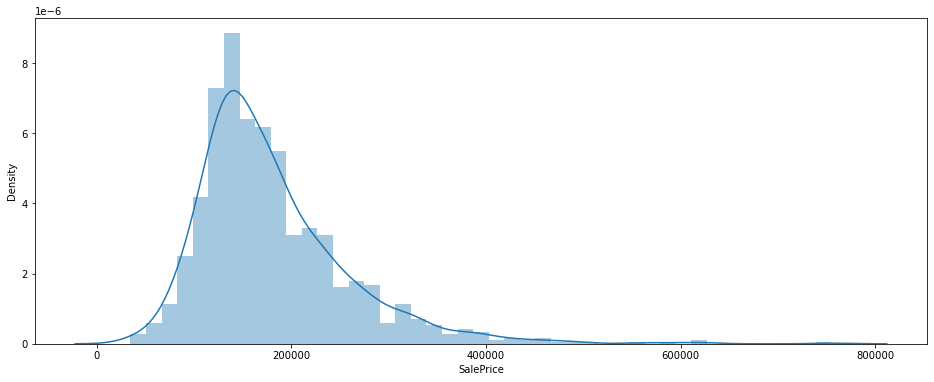

In [65]:
plt.figure(figsize=(16,6))
sns.distplot(df_train.SalePrice)
plt.show()

## Create a train test dataset

In [66]:
X = df_train.drop(['SalePrice'], axis=1)

In [67]:
X.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,4928,0,0,6,5,0.0,2,2,4,...,0,0,0,0,1,0,0,0,1,0
1,20,15865,0,1,8,6,0.0,3,3,3,...,0,0,0,0,1,0,0,0,1,0
2,60,9920,0,0,7,5,0.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
3,20,11751,0,0,6,6,480.0,2,2,4,...,0,0,0,0,0,0,0,0,1,0
4,20,16635,0,0,6,7,126.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0


In [68]:
# Putting response variable to y
y = df_train['SalePrice']

y.head()

0    128000
1    268000
2    269790
3    190000
4    215000
Name: SalePrice, dtype: int64

In [69]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
X_train.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1122,20,10721,0,0,6,6,243.0,3,2,3,...,0,0,0,0,1,0,0,0,1,0
533,70,22420,0,0,6,6,0.0,2,2,4,...,0,0,0,0,1,0,0,0,1,0
284,80,19296,3,0,6,5,399.0,2,2,3,...,0,0,0,0,1,0,0,0,1,0
727,20,9600,3,0,4,7,0.0,2,2,4,...,0,0,0,0,1,0,0,0,1,0
38,85,7540,0,0,6,6,0.0,2,2,4,...,0,0,0,0,1,0,0,0,1,0


In [72]:
X_test.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
577,20,10475,0,0,8,5,72.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
1045,60,8738,0,0,7,5,302.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
940,30,4280,3,0,5,6,0.0,2,2,3,...,0,0,0,0,1,0,0,0,1,0
1134,20,13284,3,0,5,5,0.0,2,2,4,...,0,0,0,0,1,0,0,0,1,0
811,20,8402,3,0,5,5,0.0,2,2,4,...,0,0,1,0,0,0,0,0,0,1


### Machine Learning Model for Regression and Evaluation Metrics

In [73]:
# Regression Model Function

def reg(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)
    
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [74]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, y)

RMSE Score is: 37648.687373240515
R2 Score is: 79.00415420824845
Cross Validation Score: 83.4802599461583
R2 Score - Cross Validation Score is -4.4761057379098474


In [75]:
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [76]:
model_accuracy = round(model.score(X,y) * 100)
model_accuracy

88

In [77]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, y)

RMSE Score is: 38182.53301059012
R2 Score is: 78.40450475848
Cross Validation Score: 79.07776918647077
R2 Score - Cross Validation Score is -0.6732644279907731


In [78]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, y)

RMSE Score is: 42387.89159892613
R2 Score is: 73.38556038423256
Cross Validation Score: 68.72185658843557
R2 Score - Cross Validation Score is 4.663703795796991


## here we can see that linear regression model give high accuracy other then model.